План + идеи (можно пополнять, скорее всего, не все успеем осуществить):
1. Извлечь данные в словарь/датафрейм/базу
2. Частотные слова
3. Частотность частей речи
4. Кол-во пения (если возможно)
5. Средняя длина реплики (по словам)
Среднее кол-во реплик на принцессу
6. Частотность love/friend(ship)
7. Частотность местоимений (я vs остальные (?))
8. Результаты: сайт/бот (?)
9. Бонусом, если успеется: рандомные цитаты от принцесс (случайных или определенных) или цитаты по введенному слову

In [0]:
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from collections import Counter
import csv
import sqlite3
import string
from nltk import word_tokenize

In [0]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
# загружаем нужный список стоп-слов
sw = stopwords.words('english')

In [0]:
df = pd.read_csv('princess_corpus.csv', encoding='utf-8')

In [0]:
con = sqlite3.connect('princess.db')
c = con.cursor()
df.to_sql(name='princess', con=con, if_exists='replace')

In [0]:
df

,Disney_Period,Text,Speaker_Status,Movie,Speaker,Year,UTTERANCE_NUMBER
0,EARLY,slave in the magic mirror come from the farthe...,NON-P,Snow White,queen,1937,1
1,EARLY,"what wouldst thou know, my queen ?",NON-P,Snow White,mirror,1937,2
2,EARLY,"magic mirror on the wall, who is the fairest o...",NON-P,Snow White,queen,1937,3
3,EARLY,"famed is thy beauty, majesty. but hold, a love...",NON-P,Snow White,mirror,1937,4
4,EARLY,alas for her ! reveal her name.,NON-P,Snow White,queen,1937,5
...,...,...,...,...,...,...,...
7743,LATE,we are never closing them again.,PRINCESS,Frozen,elsa,2013,984
7744,LATE,form on anna's boots.,PRINCESS,Frozen,elsa,2013,985
7745,LATE,"what? oh, elsa, they're beautiful, but you kno...",PRINCESS,Frozen,anna,2013,986
7746,LATE,look out. reindeer coming through!,NON-P,Frozen,kristoff,2013,987


In [0]:
c.execute('SELECT Text FROM princess')
phrases = c.fetchall()
phrases = phrases

In [0]:
import string

In [0]:
def lemmatization(text):
    low_text = text.lower()

    word_list = re.findall("[a-z]+'?[a-z]+", low_text) # достаём только слова
    lemm_text = ' '.join(word_list)
    return lemm_text

In [0]:
phrases_data = []
for phrase in phrases:
    lem_phrase = lemmatization(phrase[0])
    phrases_data.append(lem_phrase)
print(phrases_data)

['slave in the magic mirror come from the farthest space through wind and darkness summon thee speak let me see thy face', 'what wouldst thou know my queen', 'magic mirror on the wall who is the fairest one of all', 'famed is thy beauty majesty but hold lovely maid see rags cannot hide her gentle grace alas she is more fair than thee', 'alas for her reveal her name', 'lips red as the rose hair black as ebony skin white as snow', 'snow white', "want to know secret promise not to tell we are standing by wishing well make wish into the well that's all you have to do and if you hear it echoing your wish will soon come true i'm wishing i'm wishing for the one love to find me to find me today today i'm hoping i'm hoping and i'm dreaming of the nice things the nice things he'll say he'll say ahahahahahh ahahahahahh ahahahahahh ah ah ah ah ahh i'm wishing i'm wishing for the one love to find me to find me today", 'today', 'oh', 'hello', 'oh', "did frighten you wait wait please don't run away n

In [0]:
lem_t = []
for phrase in phrases_data:
    lemmas = []
    doc = nlp(phrase)
    for token in doc:
        lemmas.append(token.lemma_)
    lem_t.append(' '.join(lemmas))

In [0]:
lem_t

['slave in the magic mirror come from the farth space through wind and darkness summon thee speak let -PRON- see thy face',
 'what wouldst thou know -PRON- queen',
 'magic mirror on the wall who be the fair one of all',
 'famed be thy beauty majesty but hold lovely maid see rag can not hide -PRON- gentle grace alas -PRON- be more fair than thee',
 'alas for -PRON- reveal -PRON- name',
 'lips red as the rose hair black as ebony skin white as snow',
 'snow white',
 'want to know secret promise not to tell -PRON- be stand by wish well make wish into the well that be all -PRON- have to do and if -PRON- hear -PRON- echo -PRON- wish will soon come true -PRON- be wish -PRON- be wish for the one love to find -PRON- to find -PRON- today today -PRON- be hope -PRON- be hope and -PRON- be dream of the nice thing the nice thing -PRON- will say -PRON- will say ahahahahahh ahahahahahh ahahahahahh ah ah ah ah ahh -PRON- be wish -PRON- be wish for the one love to find -PRON- to find -PRON- today',
 'to

In [0]:
c.execute('ALTER TABLE princess ADD Lemmas')

In [0]:
con.commit()
con.close()

In [0]:
con = sqlite3.connect('nprincess.db')
c = con.cursor()

In [0]:
tp = []
a = 0
for i in lem_t:
    tp.append((i, a))
    a += 1

In [0]:
c.executemany('UPDATE nprincess SET Lemmas = ? WHERE inds = ?', tp)

NameError: ignored

In [0]:
con.commit()

In [0]:
c.execute('SELECT Speaker, Lemmas FROM princess WHERE ')

OperationalError: ignored

In [0]:
x = ('PRINCESS',)
c.execute('SELECT Speaker, Lemmas FROM princess WHERE Speaker_Status = ?',x) #здесь надо достать принцесс и леммы
ph = c.fetchall()   

In [0]:
ariel = []
briarrose = []
cinderella = []
snowwhite = []
belle = []
jasmine = []
nala = []
poc = []
mulan = []
tiana = []
rapunzel = []
merida = []
elsa = []
anna = []

for i in ph:
    if i[0] == "snow white":
        text = i[1]
        snowwhite.append(text)
    if i[0] == "ariel":
        text = i[1]
        ariel.append(text)
    if i[0] == "briar rose":
        text = i[1]
        briarrose.append(text)
    if i[0] == "cinderella":
        text = i[1]
        cinderella.append(text)
    if i[0] == "belle":
        text = i[1]
        belle.append(text)
    if i[0] == "jasmine":
        text = i[1]
        jasmine.append(text)
    if i[0] == "nala":
        text = i[1]
        nala.append(text)
    if i[0] == "pocahontas":
        text = i[1]
        poc.append(text)
    if i[0] == "mulan":
        text = i[1]
        mulan.append(text)
    if i[0] == "tiana":
        text = i[1]
        tiana.append(text)
    if i[0] == "rapunzel":
        text = i[1]
        rapunzel.append(text)
    if i[0] == "merida":
        text = i[1]
        merida.append(text)
    if i[0] == "elsa":
        text = i[1]
        elsa.append(text)
    if i[0] == "anna":
        text = i[1]
        anna.append(text)

In [0]:
n = 0
for i in ariel:
    len(i)
    n += len(i)
ar = n // len(ariel)
#ar
k = 0
for i in briarrose:
    len(i)
    k += len(i)
br = k // len(briarrose)
#br
w = 0
for i in cinderella:
    len(i)
    w += len(i)
ci = w // len(cinderella)
#ci
r = 0
for i in snowwhite:
    len(i)
    r += len(i)
sw = r // len(snowwhite)
#sw
a = 0
for i in belle:
    len(i)
    a += len(i)
be = a // len(belle)
#be
cr = 0
for i in jasmine:
    len(i)
    cr += len(i)
ja = cr // len(jasmine)
#ja
f = 0
for i in nala:
    len(i)
    f += len(i)
na = f // len(nala)
#na
t = 0
for i in poc:
    len(i)
    t += len(i)
po = t // len(poc)
#po
z = 0
for i in mulan:
    len(i)
    z += len(i)
mu = z // len(mulan)
#mu
g = 0
for i in tiana:
    len(i)
    g += len(i)
ti = g // len(tiana)
#ti

ra = 0
for i in rapunzel:
    len(i)
    ra += len(i)
rap = ra // len(rapunzel)
#rap
me = 0
for i in merida:
    len(i)
    me += len(i)
mer = me // len(merida)
#mer
ss = 0
for i in elsa:
    len(i)
    ss += len(i)
el = ss // len(elsa)
#el
xx = 0
for i in anna:
    len(i)
    xx += len(i)
an = xx // len(anna)
#an


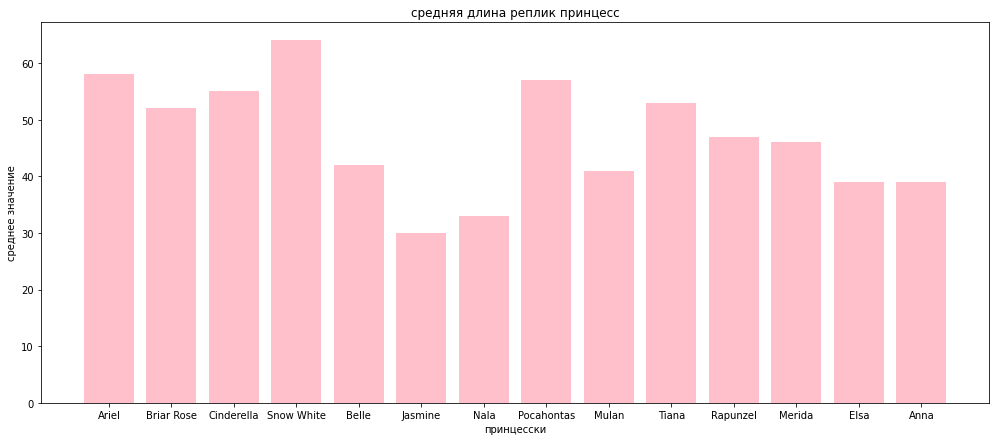

In [0]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
Y = [ar, br, ci, sw, be, ja, na, po, mu, ti, rap, mer, el, an]
plt.figure(figsize=(17, 7))
NAMES = ['Ariel', 'Briar Rose', 'Cinderella', 'Snow White', 'Belle', 'Jasmine', 'Nala', 'Pocahontas', 'Mulan','Tiana', 'Rapunzel', 'Merida', 'Elsa', 'Anna']
plt.bar(X, Y, color='pink')
plt.xticks(ticks=X, labels=NAMES)
plt.title('средняя длина реплик принцесс')
plt.ylabel('среднее значение')
plt.xlabel('принцесски')
plt.show()

In [0]:
x = ('PRINCESS',)
c.execute('SELECT Disney_Period FROM princess WHERE Speaker_Status=?', x)
periods = c.fetchall()

In [0]:
need_periods = []
for item in periods:
    if item[0] not in need_periods:
        need_periods.append(item[0])
print(need_periods)

['EARLY', 'MID', 'LATE']


In [0]:
from nltk.corpus import stopwords

In [0]:
def get_period_freq(per):
    c.execute('SELECT Lemmas FROM princess WHERE Disney_Period=?', (per,)) #Lemmas
    period_phrases = c.fetchall()
    phrases_to_go = []
    for phrase in period_phrases:
        text = phrase[0]
        text1 = text.split()
        sw = stopwords.words('english')
        for word in text1:
            if word in sw:
                continue
        else:
            phrases_to_go.append(word)
    huge_text = " ".join(phrases_to_go)
    word_cloud(per,huge_text)

In [0]:
from wordcloud import WordCloud

In [0]:
def word_cloud(per,text):
    wordcloud = WordCloud(
        background_color ='white',
        width = 1600,
        height = 800, 
        mask=alice_mask, contour_width=3, contour_color='black'
    ).generate(text)

    alice_mask = np.array(Image.open(path.join(d, "123.jpeg")))


    plt.figure(figsize = (6, 6), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.title("период "+ per)
    plt.show()

SyntaxError: ignored

In [0]:
wordcloud = WordCloud(
    mask=alice_mask, contour_width=3, contour_color='black', background_color ='red'
).generate_from_frequencies(c)

alice_mask = np.array(Image.open(path.join(d, "alice_mask.png")))

plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Top tags')
plt.show()

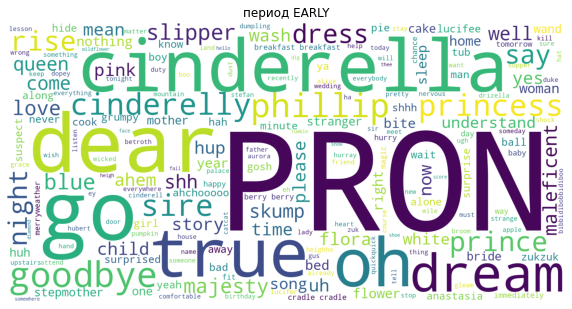

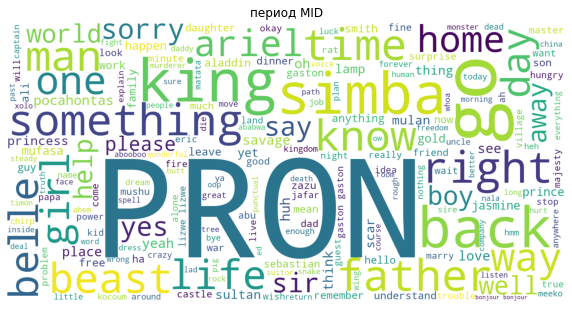

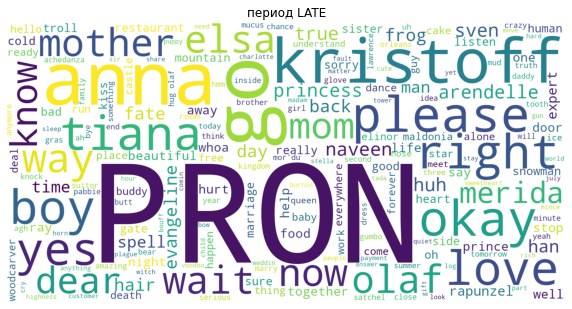

In [0]:
for per in need_periods:
    get_period_freq(per)

In [0]:
from collections import Counter # частотный словарь

In [0]:
def love_friend(per):
    c.execute('SELECT Lemmas FROM princess WHERE Speaker_Status=? and Disney_Period=?', ('PRINCESS', per))
    phrases = c.fetchall()
    phrases_to_go = []

    for phrase in phrases:
        text = phrase[0]
        text1 = text.split()
        phrases_to_go.extend(text1)
        
    clear_words = []
    sw = stopwords.words('english')
    for word in phrases_to_go:
        if word in sw:
            continue
        else:
            clear_words.append(word)
    #print(clear_words)
    #huge_text = " ".join(clear_words)
    
    cntr = Counter(clear_words)
    words = cntr.most_common()
    
    for item in words: # для красивого вывода
        if item[0] =="love":
            print(item[1],"/",len(clear_words)," ", item[0])
        if item[0] =="prince":
            print(item[1],"/",len(clear_words)," ", item[0])
        if item[0] =="friendship":
            print(item[1],"/",len(clear_words)," ", item[0])
        if item[0] =="hate":
            print(item[1],"/",len(clear_words)," ", item[0])

In [207]:
for period in need_periods:
    print(period)
    love_friend(period)

EARLY
11 / 1682   love
9 / 1682   prince
MID
16 / 3433   love
9 / 3433   prince
2 / 3433   hate
LATE
27 / 4664   love
12 / 4664   prince
1 / 4664   friendship


## Часть реплик принцесс от всех реплик в определенном периоде

In [0]:
c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="EARLY" AND Speaker_Status="PRINCESS"')
len_early = c.fetchall()
len_early = len(len_early)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="MID" AND Speaker_Status="PRINCESS"')
len_mid = c.fetchall()
len_mid = len(len_mid)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="LATE" AND Speaker_Status="PRINCESS"')
len_late = c.fetchall()
len_late = len(len_late)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="EARLY"')
len_early1 = c.fetchall()
len_early1 = len(len_early1)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="MID"')
len_mid1 = c.fetchall()
len_mid1 = len(len_mid1)

c.execute('SELECT Speaker_Status, Disney_Period FROM princess WHERE Disney_Period="LATE"')
len_late1 = c.fetchall()
len_late1 = len(len_late1)

E = len_early / len_early1
M = len_mid / len_mid1
L = len_late / len_late1

d = [{'period': 'EARLY', 'count': len_early/len_early1}, {'period': 'MID', 'count': len_mid/len_mid1}, {'period': 'LATE', 'count': len_late/len_late1}]

df1 = pd.DataFrame(d)

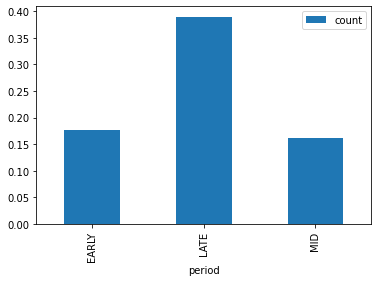

In [0]:
dff = df1.groupby('period')
dff.sum().plot.bar()